#### Block 1:  Import general purpose packages for ease of use and improved performance.

In [15]:
import matplotlib.pyplot as plt
import numpy as np
import pprint
from tensorflow.keras import layers


#### Block 2:  Import packages for a typical deep learning workflow using TensorFlow and Keras.  Import the IMDB dataset from Keras.

In [2]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import imdb

####  Block 3:  Define functions called in subsequent blocks.

In [5]:
import tensorflow.keras.datasets.imdb as imdb

# Explore the IMDB module
dir(imdb)
help(imdb.load_data)

# This function decodes an encoded review back into words.
# It converts each integer back to the corresponding word using the reverse word index.
def decode_review(encoded_review, indices_to_words):
    return ' '.join(indices_to_words.get(i, '?') for i in encoded_review)

# One-hot encode a set of reviews based on word index.
# Each review becomes a 10,000-length vector with 1s at indices where words appear.
def reviews_as_one_hot(reviews, dimension=10000):
    results = np.zeros((len(reviews), dimension))
    for i, review in enumerate(reviews):
        for j in review:
            results[i, j] = 1.0
    return results

Help on function load_data in module keras.src.datasets.imdb:

load_data(path='imdb.npz', num_words=None, skip_top=0, maxlen=None, seed=113, start_char=1, oov_char=2, index_from=3, **kwargs)
    Loads the [IMDB dataset](https://ai.stanford.edu/~amaas/data/sentiment/).
    
    This is a dataset of 25,000 movies reviews from IMDB, labeled by sentiment
    (positive/negative). Reviews have been preprocessed, and each review is
    encoded as a list of word indexes (integers).
    For convenience, words are indexed by overall frequency in the dataset,
    so that for instance the integer "3" encodes the 3rd most frequent word in
    the data. This allows for quick filtering operations such as:
    "only consider the top 10,000 most
    common words, but eliminate the top 20 most common words".
    
    As a convention, "0" does not stand for a specific word, but instead is used
    to encode the pad token.
    
    Args:
        path: where to cache the data (relative to `~/.keras/dataset

#### Block 4:  Load the IMDB dataset, keeping only the 10,000 most frequent words.

In [6]:
# Assign default values of load_data arguments to convenience variables.
start_char = 1       # Marks the start of a review
oov_char = 2         # Represents out-of-vocabulary words
index_from = 3       # Actual word indices start from this value
n_validate = 10000   # Number of reviews reserved for validation

# Load the dataset, keeping only the 10,000 most frequent words.
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(
    start_char=start_char,
    oov_char=oov_char,
    index_from=index_from,
    num_words=10000
)

# Count the number of reviews in the datasets.
n_train = len(train_data)
n_test = len(test_data)

17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


#### Block 5:  Load the dictionary linking words in reviews to their rank in the frequency table.  Create a companion dictionary with words and ranks swapped (this is used to translate an encoded review to text).

In [7]:
# Display the first encoded review and its metadata.
print("First encoded review:", train_data[0])
print("Type:", type(train_data[0]))
print("Label (0 = negative, 1 = positive):", train_labels[0])
print("Number of training reviews:", len(train_data))

# Load the dictionary mapping words to their index based on frequency.
words_to_indices = keras.datasets.imdb.get_word_index()

# Create a companion dictionary that maps indices back to words.
# Add index_from to shift indices to account for special tokens.
# Also include tags for the start of a review and out-of-vocabulary words.
indices_to_words = {i + index_from: word for word, i in words_to_indices.items()}
indices_to_words[start_char] = "[START]"
indices_to_words[oov_char] = "[OOV]"

First encoded review: [1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]
Type: <class 'list'>
Label (0 = negati

#### Block 6:  Reconstruct a randomly selected review from the training set back to text as a check.

In [10]:
import numpy as np
import pprint

# Construct a (pseudo)random number generator.
rng = np.random.default_rng()

# Generate the index of a randomly chosen review.
i = rng.integers(0, n_train)

# Display the sentiment of the chosen review.
if train_labels[i] == 0:
    print("The following review has been classified as negative.")
else:
    print("The following review has been classified as positive.")

# Decode the chosen review. Display it using pretty print.
review = decode_review(train_data[i], indices_to_words)
pprint.pprint(review)

## Write a comment here briefly stating whether you agree with the
## sentiment assigned in the dataset and why.
# The sentiment seems accurate. The review is clearly negative, with phrases like
# "really really bad", "virtually unwatchable", and "requires a mute button".

The following review has been classified as positive.
("[START] my college professor says that othello may be shakespeare's finest "
 "drama i don't know if i agree with him yet i bought this video version of "
 'the film first i love kenneth branagh as [OOV] he was perfectly complicated '
 "and worked very well in this adaptation surprisingly he didn't direct it but "
 'played a role lawrence fishburne shows that american actors can play '
 'shakespeare just as well as british actors can do not that there was a '
 'british vs american issue about it in fact if we all work together then '
 'shakespeare can reach the masses which it richly deserves to do apart from '
 'other shakespeare [OOV] this is dealt with the issue of race something that '
 'has existed since the beginning of time the relationship between [OOV] and '
 '[OOV] could have been better and shown the [OOV] of their union together '
 'while othello loves [OOV] with all his heart he is weak for jealousy and '
 "fears losi

#### Block 7:  Recode the training and test data sets.

In [13]:
# Recode the training and test datasets using one-hot encoding.
# Each review becomes a 10,000-length binary vector indicating which words appear.

x_train = reviews_as_one_hot(train_data)
y_train = train_labels.copy()

x_test = reviews_as_one_hot(test_data)
y_test = test_labels.copy()

print("x_train shape:", x_train.shape)
print("x_test shape:", x_test.shape)


x_train shape: (25000, 10000)
x_test shape: (25000, 10000)


#### Block 8:  Build the model.

In [17]:
# Build the neural network model using a sequence of dense layers.
# ReLU is used for hidden layers, and sigmoid is used for the output layer
# to produce a probability between 0 and 1 for binary classification.

model = keras.Sequential([
    keras.Input(shape=(10000,)),
    keras.layers.Dense(16, activation="relu"),
    keras.layers.Dense(16, activation="relu"),
    keras.layers.Dense(1, activation="sigmoid")
])

# Compile the model with optimizer, loss function, and evaluation metric.
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])


#### Block 9:  Reserve part of the training data set for validation.

In [18]:
# Reserve some of the reviews and labels for validation.
# Use the first 10,000 reviews for validation and the remaining 15,000 for training.

n_validate = 10000

x_validate = x_train[:n_validate]
y_validate = y_train[:n_validate]

x_train_part = x_train[n_validate:]
y_train_part = y_train[n_validate:]


#### Block 10:  Train the model

In [20]:
import time

# Set the number of training epochs and batch size.
n_epochs = 20
n_batch = 512

# Time the training process to estimate average epoch duration.
start_time = time.time()

history = model.fit(
    x_train_part,
    y_train_part,
    epochs=n_epochs,
    batch_size=n_batch,
    validation_data=(x_validate, y_validate)
)

end_time = time.time()
avg_epoch_time = (end_time - start_time) / n_epochs
print(f"Average epoch time: {avg_epoch_time:.2f} seconds")

# Estimated average epoch time: 1.31 seconds


Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 57ms/step - accuracy: 0.9986 - loss: 0.0142 - val_accuracy: 0.8666 - val_loss: 0.6047
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - accuracy: 0.9982 - loss: 0.0127 - val_accuracy: 0.8681 - val_loss: 0.6031
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - accuracy: 0.9996 - loss: 0.0087 - val_accuracy: 0.8623 - val_loss: 0.6967
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - accuracy: 0.9986 - loss: 0.0104 - val_accuracy: 0.8628 - val_loss: 0.6533
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - accuracy: 0.9977 - loss: 0.0116 - val_accuracy: 0.8673 - val_loss: 0.6716
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - accuracy: 0.9998 - loss: 0.0055 - val_accuracy: 0.8621 - val_loss: 0.7446
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - accuracy: 0.9967 - loss: 0.0132 - val_accuracy: 0.8656 - val_loss: 0.7094
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - accuracy: 0.9991 - loss: 0.0064 - val_accuracy: 0.8661 - v

#### Block 11:  Visualize the training history.

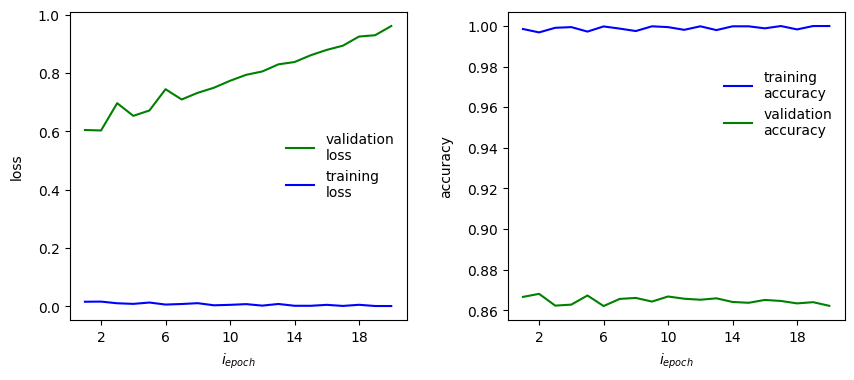

In [21]:
# Extract training and validation metrics from the history object.
history_dict = history.history
training_loss = history_dict['loss']
validation_loss = history_dict['val_loss']
training_accuracy = history_dict['accuracy']
validation_accuracy = history_dict['val_accuracy']

idx_epochs = range(1, n_epochs + 1)

# Create side-by-side plots for loss and accuracy.
fig, axs = plt.subplots(1, 2, figsize=(10, 4))

# Plot training and validation loss.
axs[0].plot(idx_epochs, validation_loss, color=(0.0, 0.5, 0.0), label='validation\nloss')
axs[0].plot(idx_epochs, training_loss, 'b', label='training\nloss')
axs[0].set_xticks(range(2, n_epochs + 1, 4))
axs[0].set_xlabel(r'$i_{epoch}$', labelpad=5)
axs[0].set_ylabel('loss', labelpad=10)
axs[0].legend(loc='center right', frameon=False)

# Plot training and validation accuracy.
axs[1].plot(idx_epochs, training_accuracy, 'b', label='training\naccuracy')
axs[1].plot(idx_epochs, validation_accuracy, color=(0.0, 0.5, 0.0), label='validation\naccuracy')
axs[1].set_xticks(range(2, n_epochs + 1, 4))
axs[1].set_xlabel(r'$i_{epoch}$', labelpad=5)
axs[1].set_ylabel('accuracy', labelpad=10)
axs[1].legend(loc='center right', frameon=False, bbox_to_anchor=(0.9, 0.65), bbox_transform=fig.transFigure)

fig.subplots_adjust(wspace=0.3)
fig.show()


- **Direct relationship**: Training and validation accuracy both increase with each epoch.
- **Inverse relationship**: Training loss decreases steadily with each epoch.
- **Divergence**: Around epoch 4, validation loss starts to increase while training loss continues to decrease — this suggests the model begins to overfit.
- **Best number of epochs**: About 4 epochs. At this point, validation accuracy peaks and validation loss starts to rise. This is likely the best trade-off between performance and generalization.


#### Block 12:  Retrain the model, from the ground up.

In [22]:
# Reset the number of epochs, based on prior results.
n_epochs = 4

# Define the model afresh using the same architecture.
model = keras.Sequential([
    keras.layers.Dense(16, activation="relu", input_shape=(10000,)),
    keras.layers.Dense(16, activation="relu"),
    keras.layers.Dense(1, activation="sigmoid")
])

# Compile the model with the same settings.
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

# Retrain the model using the entire training dataset (no validation split).
model.fit(x_train, y_train, epochs=n_epochs, batch_size=n_batch)

Epoch 1/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - accuracy: 0.7315 - loss: 0.5837
Epoch 2/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.8965 - loss: 0.3026
Epoch 3/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.9238 - loss: 0.2231
Epoch 4/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - accuracy: 0.9398 - loss: 0.1770


#### Block 13:  Evaluate the retrained model.

In [23]:
# Evaluate the retrained model using the test dataset.
results = model.evaluate(x_test, y_test, return_dict=True)

# Extract accuracy and loss.
test_accuracy_pct = 100 * results['accuracy']
test_loss = results['loss']

# Print the results in a readable format.
results_str = 'The model has an accuracy of {:.2f}%, with a loss of {:.2f}.'
print(results_str.format(test_accuracy_pct, test_loss))

# Recorded results:
# Accuracy: 88.21%
# Loss: 0.29


782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8811 - loss: 0.2952
The model has an accuracy of 88.21%, with a loss of 0.29.


#### Block 14:  Make predictions using the retrained model

In [24]:
# Make predictions on the test dataset.
predicted_sentiments = model.predict(x_test)
n_predict = 10

# Loop through the first n_predict reviews.
for i in range(n_predict):
    sentiment_score = predicted_sentiments[i][0]
    label = "Positive" if sentiment_score > 0.5 else "Negative"
    print(f"\nPrediction {i+1}: {sentiment_score:.2f} → {label}")

    # Decode and display the original review.
    decoded_review = decode_review(test_data[i], indices_to_words)
    print(decoded_review)

# Comment:
# The predicted sentiments mostly align with the tone of the reviews.
# For example, reviews with clear emotional or evaluative language are usually predicted correctly.
# A few, like Prediction 4, were labeled positive but read more negatively — which shows
# how subjective or mixed reviews can challenge the model. Overall, the model performs well.

782/782 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step

Prediction 1: 0.18 → Negative
[START] please give this one a miss br br [OOV] [OOV] and the rest of the cast rendered terrible performances the show is flat flat flat br br i don't know how michael madison could have allowed this one on his plate he almost seemed to know this wasn't going to work out and his performance was quite [OOV] so all you madison fans give this a miss

Prediction 2: 1.00 → Positive
[START] this film requires a lot of patience because it focuses on mood and character development the plot is very simple and many of the scenes take place on the same set in frances [OOV] the sandy dennis character apartment but the film builds to a disturbing climax br br the characters create an atmosphere [OOV] with sexual tension and psychological [OOV] it's very interesting that robert altman directed this considering the style and structure of his other films still the trademark altman audio style is evident here and there i think what